## Devasy Patel
## 20BCE057
## Practical - 5
# DIPA

To experiment and analyze how histogram equalization will help enhance the image provided during the lab session. Also, use equalization on five different types of images and find out in which case it gives the weakest enhancement.

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


In [ ]:
cdf = 0
pdf = 0

In [ ]:
image.shape

(618, 1000)

In [ ]:
i

27408


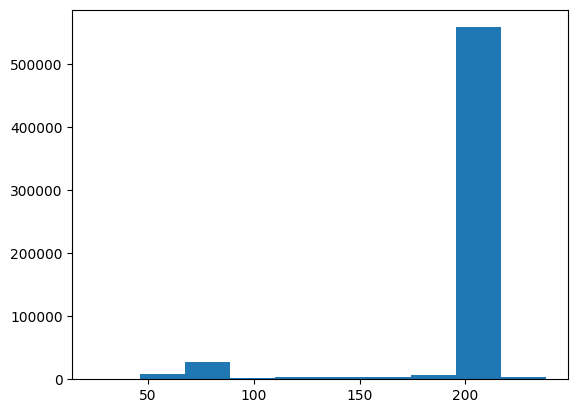

In [ ]:
image = cv2.imread('img.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = np.array(image, dtype='uint8')
def pdf(image):
  img = image.flatten()
  plt.hist(img)
  pdf_arr = np.zeros((255), dtype='uint8')
  for i in img:
    pdf_arr[i]+=1
  return pdf_arr


x = pdf(image)
x

# print(sum(x))

(array([83.,  6.,  3., 17., 22., 29., 31., 28., 17., 19.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

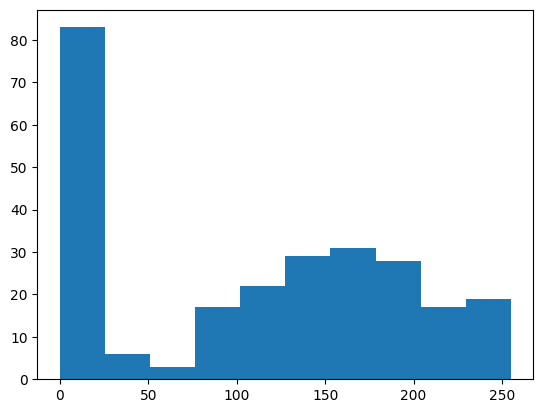

In [ ]:
plt.hist(x)
# print(x)

(array([206.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  50.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

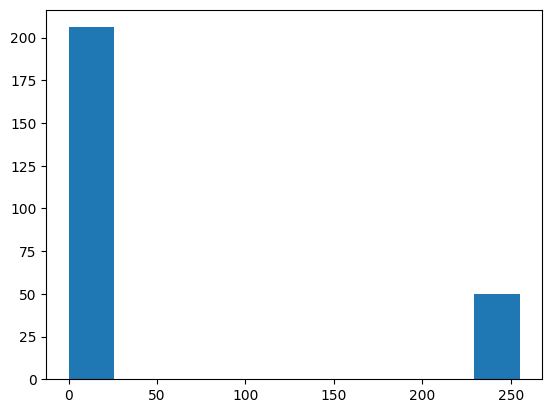

In [ ]:
# js input output
# encryption-decryption

def cdf(image, scale):
  img = image.flatten()
  pdf_arr = np.zeros((256), dtype='int')
  for i in img:
    pdf_arr[i]+=1
  # cdf_arr = np.zeros((255))
  csum = np.cumsum(pdf_arr)
  last = csum[-1]
  cdf = np.array((np.array(csum)/last)*scale, dtype='uint8')


  return cdf


plt.hist(cdf(image, 255))

## Now comparing b/w 2 images

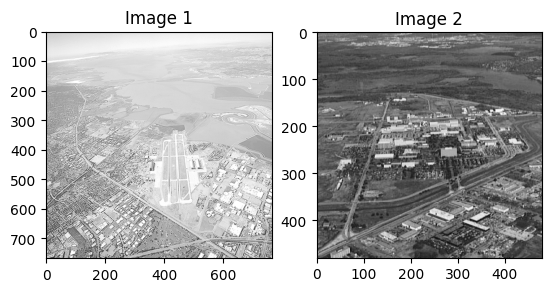

In [ ]:
img1 = cv2.imread('lowcont.jpg')
img2 = cv2.imread('highcont.jpg')

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
# Create subplots to display the images side by side
plt.subplot(1, 2, 1)
plt.imshow(img1, cmap='gray')
plt.title('Image 1')

plt.subplot(1, 2, 2)
plt.imshow(img2, cmap='gray')
plt.title('Image 2')

# Show the plot
plt.show()

In [ ]:
def hist_matching(cdf1, cdf2):
  T=np.zeros((256, ), dtype='int')
  for i in range(255):
    val = cdf1[i]
    j=0
    while cdf2[j]<=val:
      j+=1
    T[i]=j
  return T
Tf = hist_matching(cdf(img1, 255), cdf(img2, 255))


In [ ]:
Tf.shape

(256,)

In [ ]:
img1[1][0]

array([199, 199, 199], dtype=uint8)

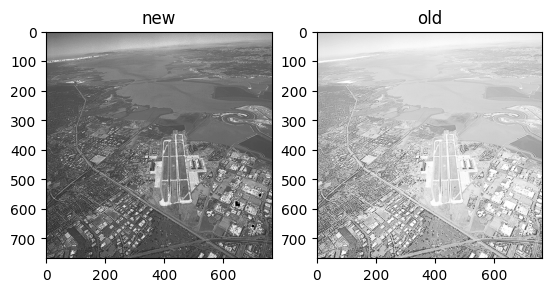

In [ ]:
def plot_tf(img1, T):
  transferred = np.zeros((img1.shape[0], img1.shape[1]), dtype='uint8')
  for i in range(img1.shape[0]):
    for j in range(img1.shape[1]):
      transferred[i][j] = T[img1[i][j]]
  plt.subplot(1,2,1)
  plt.title('new')
  plt.imshow(transferred, cmap='gray')
  plt.subplot(1,2,2)
  plt.title('old')
  plt.imshow(img1, cmap='gray')

plot_tf(img1, Tf)